

<center> <h1 style="background-color:purple; color:white" >RFM Analysis</h1> 

<center><img
src="https://s3-eu-west-1.amazonaws.com/blog.omniconvert.com-media/blog/wp-content/uploads/2016/03/06173334/feature-img-marketizator-rfm.png" style="width:100%;height:40%;">
</center>
    
<br>    
    
<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" style="background-color:purple; color:white" data-toggle="list"  role="tab" aria-controls="home">Notebook Content!</h3>  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#libraries" role="tab" aria-controls="profile" style="color:purple">Import Libraries<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">1</span></a>
  <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#load" role="tab" aria-controls="messages" style="color:purple">Load Data<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">2</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#missing" role="tab" aria-controls="settings" style="color:purple">Missing Values<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#summary" role="tab" aria-controls="settings" style="color:purple">Summary Stats & Outlier Values<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#rfm" role="tab" aria-controls="settings" style="color:purple">RFM<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">5</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#visualize" role="tab" aria-controls="settings" style="color:purple"> Visualize<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">6</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#notebooks" role="tab" aria-controls="settings" style="color:purple"> My Notebooks<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">7</span></a>


<h1 style="color:purple" >RFM - Recency Frequency Monetary</h1> 

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

RFM stands for the three dimensions:

- **R**ecency – How recently did the customer purchase?
- **F**requency – How often do they purchase?
- **M**onetary Value – How much do they spend?

Customer purchases may be represented by a table with columns for the customer name, date of purchase and purchase value. One approach to RFM is to assign a score for each dimension on a scale from 1 to 10. The maximum score represents the preferred behavior and a formula could be used to calculate the three scores for each customer. For example, a service-based business could use these calculations:

- **Recency** = the maximum of "10 – the number of months that have passed since the customer last purchased" and 1
- **Frequency** = the maximum of "the number of purchases by the customer in the last 12 months (with a limit of 10)" and 1
- **Monetary** = the highest value of all purchases by the customer expressed as a multiple of some benchmark value

Alternatively, categories can be defined for each attribute. For instance, Recency might be broken into three categories: customers with purchases within the last 90 days; between 91 and 365 days; and longer than 365 days. Such categories may be derived from business rules or using data mining techniques to find meaningful breaks.

Once each of the attributes has appropriate categories defined, segments are created from the intersection of the values. If there were three categories for each attribute, then the resulting matrix would have twenty-seven possible combinations (one well-known commercial approach uses five bins per attributes, which yields 125 segments). Companies may also decide to collapse certain subsegments, if the gradations appear too small to be useful. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value). Identifying the most valuable RFM segments can capitalize on chance relationships in the data used for this analysis. For this reason, it is highly recommended that another set of data be used to validate the results of the RFM segmentation process. Advocates of this technique point out that it has the virtue of simplicity: no specialized statistical software is required, and the results are readily understood by business people. In the absence of other targeting techniques, it can provide a lift in response rates for promotions.

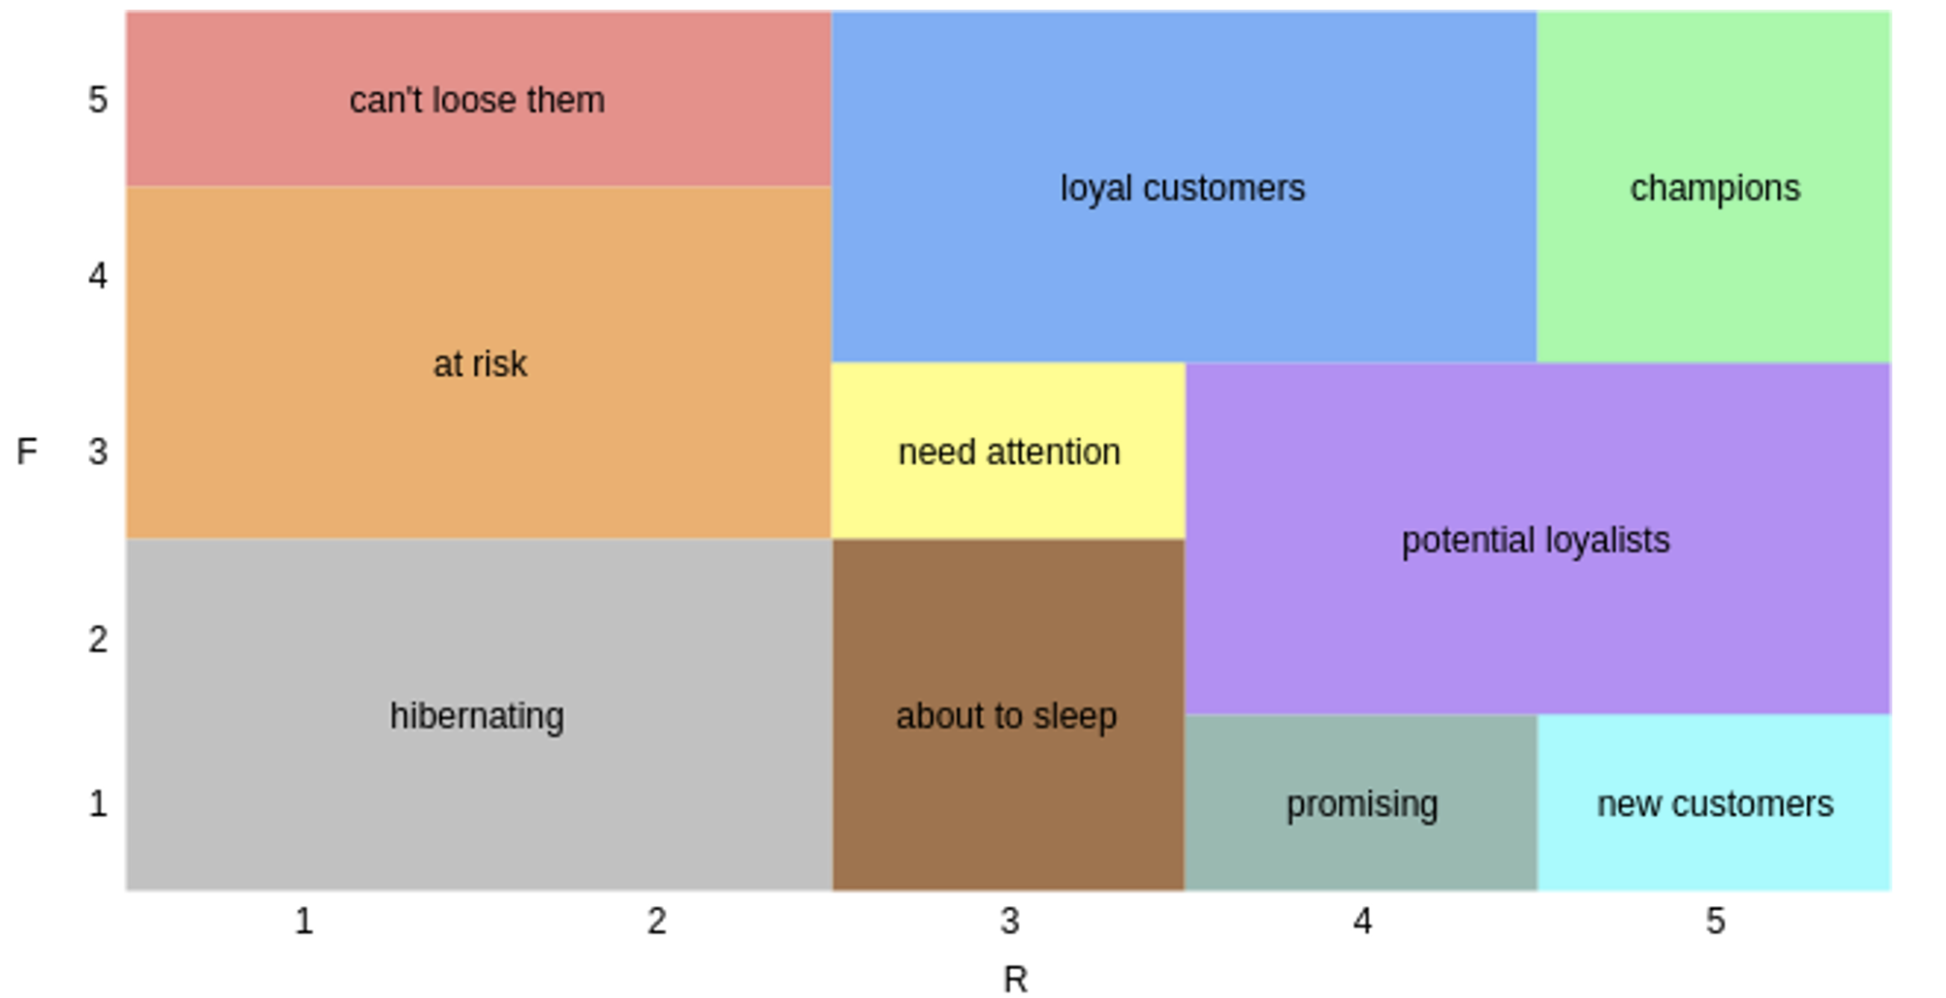

<a id='libraries'></a>
<h1 style="color:purple" >1. Packages</h1> 

In [1]:
# ----------------------------
# BASE
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# ----------------------------
# TREEMAP
# pip install squarify
import squarify  

# ----------------------------
# CONFIGURATION
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

<a id='load'></a>
<h1 style="color:purple" >2. Data</h1> 

In [2]:
raw9 = pd.read_excel("../input/online-retail-ii-dataset/online_retail_II.xlsx", sheet_name = "Year 2009-2010")
raw10 = pd.read_excel("../input/online-retail-ii-dataset/online_retail_II.xlsx", sheet_name = "Year 2010-2011")
df1 = raw9.copy()
df2 = raw10.copy()

In [3]:
(df1.shape, df2.shape)

((525461, 8), (541910, 8))

In [4]:
df2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France


<a id='missing'></a>
<h1 style="color:purple" >3. Missing Values</h1> 

In [5]:
print("2009-2010")
print("Missing Frequency: \n")
print(df1.isnull().sum().sort_values(ascending = False), "\n")
print("Missing Proportion: \n")
print((df1.isnull().sum() / df1.shape[0]).sort_values(ascending = False))
print("")
print("2010-2011")
print("Missing Frequency: \n")
print(df2.isnull().sum().sort_values(ascending = False), "\n")
print("Missing Proportion: \n")
print((df2.isnull().sum() / df2.shape[0]).sort_values(ascending = False))

2009-2010
Missing Frequency: 

Customer ID    107927
Description      2928
Country             0
Price               0
InvoiceDate         0
Quantity            0
StockCode           0
Invoice             0
dtype: int64 

Missing Proportion: 

Customer ID   0.21
Description   0.01
Country       0.00
Price         0.00
InvoiceDate   0.00
Quantity      0.00
StockCode     0.00
Invoice       0.00
dtype: float64

2010-2011
Missing Frequency: 

Customer ID    135080
Description      1454
Country             0
Price               0
InvoiceDate         0
Quantity            0
StockCode           0
Invoice             0
dtype: int64 

Missing Proportion: 

Customer ID   0.25
Description   0.00
Country       0.00
Price         0.00
InvoiceDate   0.00
Quantity      0.00
StockCode     0.00
Invoice       0.00
dtype: float64


In [6]:
# Remove Missing Values
df1.dropna(inplace = True)
df2.dropna(inplace = True)

<a id='summary'></a>
<h1 style="color:purple" >4. Summary Stats & Outlier Values</h1> 

In [7]:
# 2009-2010
df1.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,50%,90%,95%,99%,max
Quantity,417534.00,12.76,101.22,-9360.00,-2.00,1.00,1.00,1.00,4.00,24.00,36.00,144.00,19152.00
Price,417534.00,3.89,71.13,0.00,0.29,0.42,0.65,0.85,1.95,6.75,8.50,14.95,25111.09
Customer ID,417534.00,15360.65,1680.81,12346.00,12435.00,12725.00,13042.00,13624.00,15311.00,17706.00,17913.00,18196.00,18287.00


In [8]:
# 2010-2011
df2.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,50%,90%,95%,99%,max
Quantity,406830.00,12.06,248.69,-80995.00,-2.00,1.00,1.00,1.00,5.00,24.00,36.00,120.00,80995.00
Price,406830.00,3.46,69.32,0.00,0.21,0.42,0.55,0.85,1.95,6.75,8.50,15.00,38970.00
Customer ID,406830.00,15287.68,1713.60,12346.00,12415.00,12626.00,12876.00,13536.00,15152.00,17719.00,17905.00,18212.00,18287.00


**Remove negative values!**

Negative values are returned items.

In [9]:
df1 = df1[~df1["Invoice"].str.contains("C", na = False)]
df2 = df2[~df2["Invoice"].str.contains("C", na = False)]

In [10]:
df1.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,50%,90%,95%,99%,max
Quantity,407695.00,13.59,96.84,1.00,1.00,1.00,1.00,2.00,5.00,24.00,36.00,144.00,19152.00
Price,407695.00,3.29,34.76,0.00,0.29,0.42,0.65,0.85,1.95,6.75,8.50,14.95,10953.50
Customer ID,407695.00,15368.50,1679.80,12346.00,12435.00,12731.00,13044.00,13635.00,15321.00,17706.00,17913.00,18196.00,18287.00


In [11]:
df2.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,50%,90%,95%,99%,max
Quantity,397925.00,13.02,180.42,1.00,1.00,1.00,1.00,2.00,6.00,24.00,36.00,120.00,80995.00
Price,397925.00,3.12,22.10,0.00,0.21,0.42,0.55,0.85,1.95,6.35,8.50,14.95,8142.75
Customer ID,397925.00,15294.31,1713.17,12346.00,12415.00,12627.00,12883.00,13552.00,15159.00,17725.00,17912.00,18211.00,18287.00


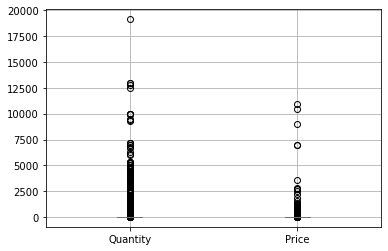

In [12]:
df1[["Quantity", "Price"]].boxplot();

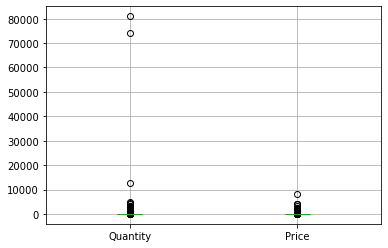

In [13]:
df2[["Quantity", "Price"]].boxplot()

<a id='rfm'></a>
<h1 style="color:purple" >5. RFM Analysis</h1> 

<h2 style="color:purple" >Recency</h2> 

In [14]:
print("2009-2010: Min Date", df1["InvoiceDate"].min(), "Max Date", df1["InvoiceDate"].max())
print("2010-2011: Min Date", df2["InvoiceDate"].min(), "Max Date", df2["InvoiceDate"].max())

2009-2010: Min Date 2009-12-01 07:45:00 Max Date 2010-12-09 20:01:00
2010-2011: Min Date 2010-12-01 08:26:00 Max Date 2011-12-09 12:50:00


In [15]:
recency1 = (dt.datetime(2010, 12, 9) - df1.groupby("Customer ID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})
recency2 = (dt.datetime(2011, 12, 9) - df2.groupby("Customer ID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})

recency1["Recency"] = recency1["Recency"].apply(lambda x: x.days)
recency2["Recency"] = recency2["Recency"].apply(lambda x: x.days)

recency2.head()

,Recency
Customer ID,
12346.00,324
12347.00,1
12348.00,74
12349.00,17
12350.00,309


<h2 style="color:purple" >Frequency</h2> 


In [16]:
freq1 = df1.groupby("Customer ID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})
freq2 = df2.groupby("Customer ID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})

freq2

,Frequency
Customer ID,
12346.00,1
12347.00,7
12348.00,4
12349.00,1
12350.00,1
...,...
18280.00,1
18281.00,1
18282.00,2


<h2 style="color:purple" >Monetary</h2> 


In [17]:
df1["TotalPrice"] = df1["Quantity"] * df1["Price"]
df2["TotalPrice"] = df2["Quantity"] * df2["Price"]

monetary1 = df1.groupby("Customer ID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})
monetary2 = df2.groupby("Customer ID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})

monetary2.head()

,Monetary
Customer ID,
12346.00,77183.60
12347.00,4310.00
12348.00,1797.24
12349.00,1757.55
12350.00,334.40


In [18]:
rfm1 = pd.concat([recency1, freq1, monetary1],  axis=1)
rfm2 = pd.concat([recency2, freq2, monetary2],  axis=1)

rfm2.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.00,324,1,77183.60
12347.00,1,7,4310.00
12348.00,74,4,1797.24
12349.00,17,1,1757.55
12350.00,309,1,334.40


<h2 style="color:purple" >Create RFM Score</h2> 

In [19]:
rfm1["RecencyScore"] = pd.qcut(rfm1["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm2["RecencyScore"] = pd.qcut(rfm2["Recency"], 5, labels = [5, 4 , 3, 2, 1])

rfm1["FrequencyScore"]= pd.qcut(rfm1["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm2["FrequencyScore"]= pd.qcut(rfm2["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])

rfm1["MonetaryScore"] = pd.qcut(rfm1['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm2["MonetaryScore"] = pd.qcut(rfm2['Monetary'], 5, labels = [1, 2, 3, 4, 5])

rfm2.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346.00,324,1,77183.60,1,1,5
12347.00,1,7,4310.00,5,5,5
12348.00,74,4,1797.24,2,4,4
12349.00,17,1,1757.55,4,1,4
12350.00,309,1,334.40,1,1,2


In [20]:
# RFM Scores: Category
rfm1["RFM_SCORE"] = (rfm1['RecencyScore'].astype(str) + 
                     rfm1['FrequencyScore'].astype(str) + 
                     rfm1['MonetaryScore'].astype(str))

rfm2["RFM_SCORE"] = (rfm2['RecencyScore'].astype(str) + 
                     rfm2['FrequencyScore'].astype(str) + 
                     rfm2['MonetaryScore'].astype(str))

rfm2.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346.00,324,1,77183.60,1,1,5,115
12347.00,1,7,4310.00,5,5,5,555
12348.00,74,4,1797.24,2,4,4,244
12349.00,17,1,1757.55,4,1,4,414
12350.00,309,1,334.40,1,1,2,112


In [21]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm1['Segment'] = rfm1['RecencyScore'].astype(str) + rfm1['FrequencyScore'].astype(str)
rfm1['Segment'] = rfm1['Segment'].replace(seg_map, regex=True)

rfm2['Segment'] = rfm2['RecencyScore'].astype(str) + rfm2['FrequencyScore'].astype(str)
rfm2['Segment'] = rfm2['Segment'].replace(seg_map, regex=True)

rfm2.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.00,324,1,77183.60,1,1,5,115,Hibernating
12347.00,1,7,4310.00,5,5,5,555,Champions
12348.00,74,4,1797.24,2,4,4,244,At Risk
12349.00,17,1,1757.55,4,1,4,414,Promising
12350.00,309,1,334.40,1,1,2,112,Hibernating


<h2 style="color:purple" >Summary Statistics</h2> 

In [22]:
rfmStats1 = rfm1[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats1.columns = rfmStats1.columns.map('_'.join).str.strip('|')
rfmStats1

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,51.85,51.00,343,10.26,1.20,1.00,343,0.40,442.27,317.76,343,417.30
At Risk,149.94,128.00,611,69.98,3.07,3.00,611,1.09,1188.21,760.19,611,1844.17
Can't Loose,121.72,106.50,78,49.72,9.04,7.50,78,5.78,4072.97,2316.49,78,5275.40
Champions,5.12,5.00,663,4.62,12.50,8.00,663,17.19,6852.26,2508.32,663,21556.38
Hibernating,212.31,211.00,1016,89.78,1.13,1.00,1016,0.33,401.98,250.15,1016,775.08
Loyal Customers,34.28,29.00,743,16.06,6.82,5.00,743,4.38,2743.48,1818.71,743,3255.11
Need Attention,51.21,51.00,207,9.84,2.45,2.00,207,0.50,1058.79,730.47,207,1190.26
New Customers,6.58,6.50,50,4.31,1.00,1.00,50,0.00,386.20,258.83,50,493.32
Potential Loyalists,16.77,17.00,516,9.73,2.02,2.00,516,0.70,729.16,523.66,516,837.55


In [23]:
rfmStats2 = rfm2[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats2.columns = rfmStats2.columns.map('_'.join).str.strip('|')
rfmStats2

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,51.37,51,353,10.97,1.16,1,353,0.37,472.55,331.95,353,532.93
At Risk,152.04,137,594,68.64,2.87,3,594,0.94,1079.81,675.16,594,2559.61
Can't Loose,130.05,105,64,65.15,8.31,7,64,4.14,2791.01,2236.74,64,2074.24
Champions,4.37,3,632,3.68,12.34,8,632,16.37,6866.78,2613.85,632,20354.66
Hibernating,215.66,217,1069,92.04,1.10,1,1069,0.30,488.86,293.00,1069,2421.94
Loyal Customers,31.69,28,820,15.60,6.44,5,820,4.45,2862.89,1737.83,820,6003.49
Need Attention,50.27,50,184,11.53,2.32,2,184,0.47,894.49,637.78,184,1110.27
New Customers,5.43,6,42,3.90,1.00,1,42,0.00,388.21,274.50,42,570.78
Potential Loyalists,15.37,16,486,9.34,2.01,2,486,0.65,1041.34,524.00,486,7640.53


<a id='visualize'></a>
<h1 style="color:purple" >6. Visualize</h1> 

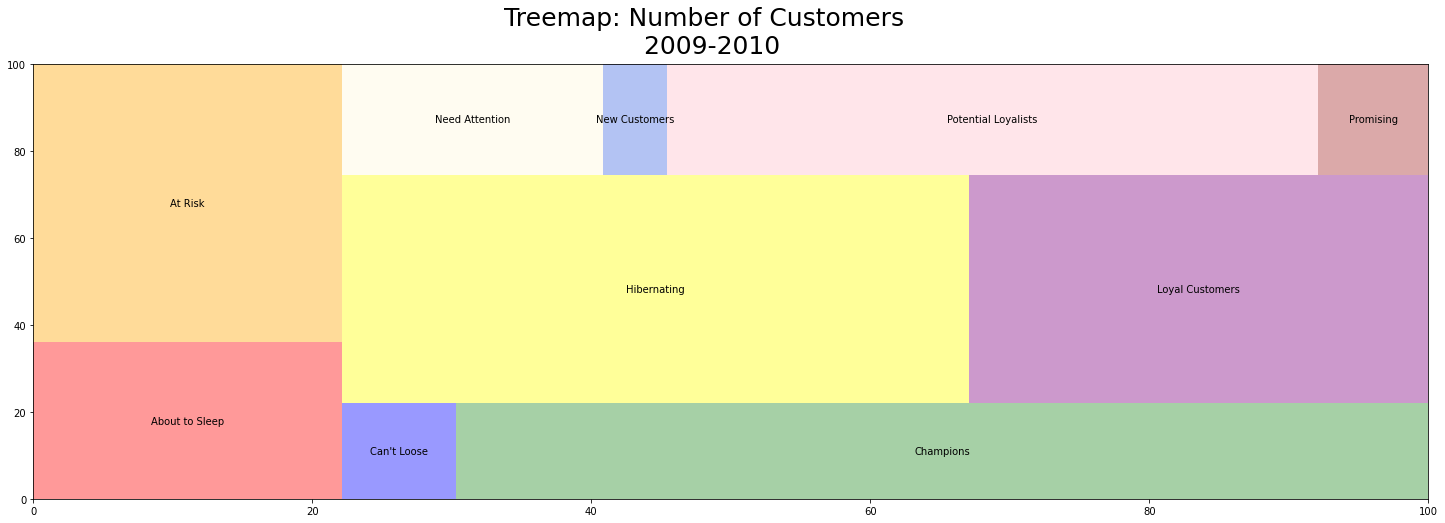

In [24]:
plt.figure(figsize = (25,8))
squarify.plot(sizes=rfmStats1.Recency_count, label=rfmStats1.index, 
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.4 )
plt.suptitle("Treemap: Number of Customers \n 2009-2010", fontsize=25);


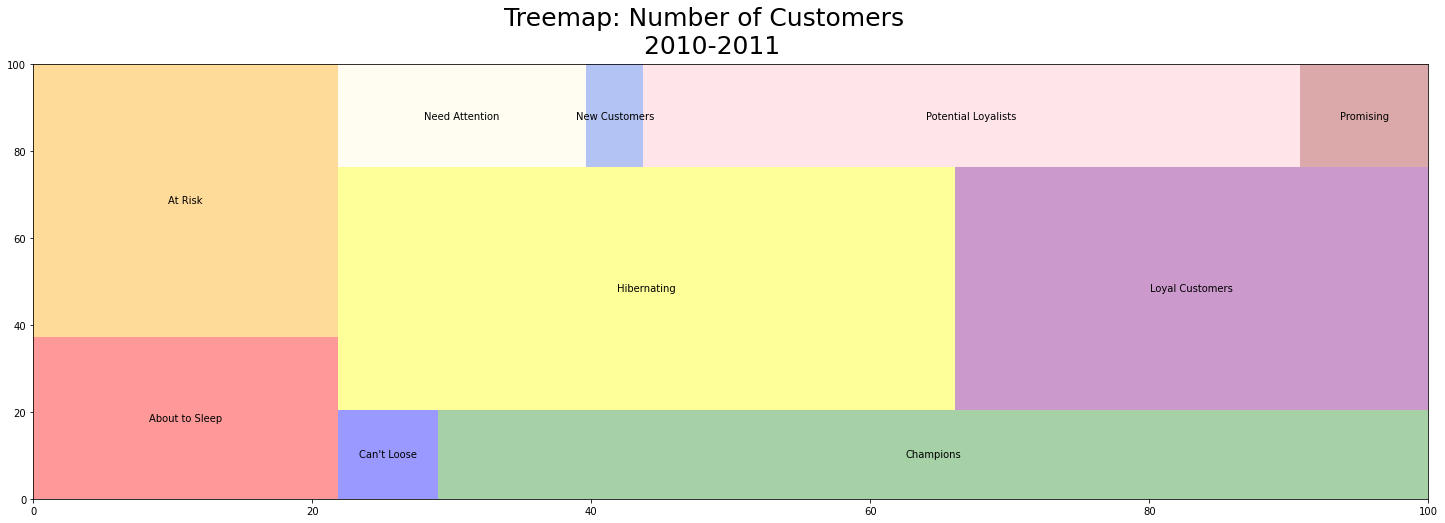

In [25]:
plt.figure(figsize = (25,8))
squarify.plot(sizes=rfmStats2.Recency_count, label=rfmStats2.index, 
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.4 )
plt.suptitle("Treemap: Number of Customers \n 2010-2011", fontsize=25);

<a id='notebooks'></a>
<h1 style="color:purple" >7. My Notebooks</h1> 


<div class="row">
  <div class="col-sm-3">
    <div class="card">
      <div class="card-body" style="width: 18rem;">
        <h5 class="card-title">Marvel Universe: Civil War</h5>
          <img src="https://i.pinimg.com/originals/5d/02/9a/5d029aa478d79c8e7bcc99d020bad47b.jpg" class="card-img-top" alt="...">
        <hr>
        <a href="https://www.kaggle.com/ekrembayar/marvel-universe-civil-war" class="btn btn-primary" style="color:white;">Go to Notebook</a>
      </div>
    </div>
  </div>
  <div class="col-sm-3">
    <div class="card">
      <div class="card-body" style="width: 18rem;">
        <h5 class="card-title">THE LAST DANCE</h5>
          <img src="https://www.kolpaper.com/wp-content/uploads/2020/05/The-Last-Dance-Wallpaper-2.jpg" class="card-img-top" alt="...">
        <hr>
        <a href="https://www.kaggle.com/ekrembayar/the-last-dance-data-visualization" class="btn btn-primary" style="color:white;">Go to Notebook</a>
      </div>
    </div>
  </div>
  <div class="col-sm-3">
    <div class="card">
      <div class="card-body" style="width: 18rem;">
        <h5 class="card-title">FBI Data Cleaning</h5>
          <img src="http://idora.gazetevatan.com/vatanmediafile/Haber598x362/2020/07/10/fbi-sosyal-medya-fenomenini-kacirdi--4618794.Jpeg" class="card-img-top" alt="...">
        <hr>
        <a href="https://www.kaggle.com/ekrembayar/hadley-wickham-s-tidy-principles-fbi-data-cleaning" class="btn btn-primary" style="color:white;">Go to Notebook</a>
      </div>
    </div>
  </div>
  <div class="col-sm-3">
    <div class="card">
      <div class="card-body" style="width: 18rem;">
        <h5 class="card-title">Chess EDA with R</h5>
          <img src="https://thebridge.in/wp-content/uploads/2020/03/Chess-Image-Hans-India-1280x720.jpg" class="card-img-top" alt="...">
        <hr>
        <a href="https://www.kaggle.com/ekrembayar/chess-eda-with-r" class="btn btn-primary" style="color:white;">Go to Notebook</a>
      </div>
    </div>
  </div>
    

<h3 style="color:purple" >If you like the notebook, don’t forget upvote! :)</h3> 
